<a href="https://colab.research.google.com/github/ToluPaul/heart_stability/blob/main/heart_stability_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import neccessary modules
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
from sklearn.model_selection import train_test_split
!pip install torchmetrics
from torchmetrics import Accuracy
import torch.nn.init as init
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In order to maximize performance you can follow the steps below:
 * Overfit the Training set (start with just one batchsize of the whole data)so as to:
  * see if the problem is solvable
  * Set a performance baseline
 * Reduce overfitting:
  * Improve performance on the validation set

* Fine_tune hyperparameters(lr/momentum)

In [ ]:
 #Read the dataset
heart_data= pd.read_csv('/content/heart_attack_analysis_pred.csv')
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#designate the features column
heart_data_feat_col = heart_data.columns[:-1]
heart_data_feat = heart_data[heart_data_feat_col]

In [ ]:
#normalize the features data
for column in heart_data_feat:
  heart_data_feat[column] = (heart_data_feat[column] - heart_data_feat[column].min()) / (heart_data_feat[column].max() - heart_data_feat[column].min())
print(heart_data_feat.head())

        age  sex        cp    trtbps      chol  fbs  restecg  thalachh  exng  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   1.0   

    oldpeak  slp  caa     thall  
0  0.370968  0.0  0.0  0.333333  
1  0.564516  0.0  0.0  0.666667  
2  0.225806  1.0  0.0  0.666667  
3  0.129032  1.0  0.0  0.666667  
4  0.096774  1.0  0.0  0.666667  


In [ ]:
#Breakdown the dataset into training, evaluation and testing dataset
heart_data_norm = heart_data.copy()
heart_data_norm[heart_data_feat_col] = heart_data_feat
display(heart_data_norm.head())
X_train, X_final, y_train, y_final = train_test_split(heart_data_norm[heart_data_feat_col], heart_data_norm['output'], test_size=0.3, random_state=30)
X_eval, X_test, y_eval, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=30)
heart_train = pd.concat([X_train, y_train], axis=1)
heart_eval = pd.concat([X_eval, y_eval], axis=1)
heart_test = pd.concat([X_test, y_test], axis=1)
display(heart_train.head())
display(len(heart_eval))
display(len(heart_test))
heart_train.to_csv('heart_train.csv')
heart_eval.to_csv('heart_eval.csv')
heart_test.to_csv('heart_test.csv')
#heart_data_norm.to_csv('heart_data_norm.csv')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
6,0.562500,0.0,0.333333,0.433962,0.383562,0.0,0.0,0.625954,0.0,0.209677,0.5,0.00,0.666667,1
139,0.729167,1.0,0.000000,0.320755,0.312785,0.0,0.5,0.259542,1.0,0.032258,0.5,0.25,1.000000,1
28,0.750000,0.0,0.666667,0.433962,0.664384,1.0,0.0,0.656489,0.0,0.129032,1.0,0.25,0.666667,1
37,0.520833,1.0,0.666667,0.528302,0.242009,0.0,0.0,0.717557,0.0,0.258065,1.0,0.00,1.000000,1
224,0.520833,1.0,0.000000,0.150943,0.257991,0.0,0.5,0.419847,1.0,0.451613,0.5,0.25,1.000000,0


60

31

A quick Test run on how the pytorch learning framework works

In [ ]:
 #len(features.columns)
#F.one_hot(torch.tensor(0), num_classes=3)

In [ ]:
#Initialize a random dataset for testing the dummy model
np.random.seed(32)
numpy_data = np.random.random(10)
numpy_data = np.float32(numpy_data)
print(numpy_data)

[0.8588893  0.37271115 0.55512875 0.9556565  0.7366696  0.81620514
 0.10108656 0.9284881  0.60910916 0.59655344]


In [ ]:
#Convert the numpy array to a torch tensor and check the attributes of the dataset
numpy_input = torch.from_numpy(numpy_data)
display(numpy_input.dtype)
display(numpy_input.device)
display(numpy_input.shape)

torch.float32

device(type='cpu')

torch.Size([10])

In [ ]:
#Build a dummy model and create a one_hot_encoder for 3 outputs
model1 = nn.Sequential(
    nn.Linear(10, 18),
    nn.Linear(18, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    #nn.ReLU()
    #nn.LeakyReLU(0.05)
    #nn.Dropout(p=0.5) -to avoid overfitting
)
prediction = model1(numpy_input)
one_hot_target = F.one_hot(torch.tensor(0), num_classes=3)

In [ ]:
print(prediction)

tensor([-0.5439,  0.0391, -0.3172], grad_fn=<ViewBackward0>)


In [ ]:
#Calculate the loss and comput the gradients
criterion = CrossEntropyLoss()
loss = criterion(prediction.double(), one_hot_target.double())
loss.backward()
optimizer = optim.SGD(model1.parameters(), lr=0.001)#weight_decay=1e-4 -use small values, this helps to encourage smaller weights
optimizer.step()
#Data Augmentation can also be used to fight overfitting

In [ ]:
#Check the weight and bias gradients for the linear functions
model1[0].weight.grad, model1[0].bias.grad
model1[1].weight.grad, model1[1].bias.grad
model1[3].weight.grad, model1[3].bias.grad

(tensor([[-0.1349, -0.1853, -0.0865, -0.4749],
         [ 0.0793,  0.1090,  0.0508,  0.2793],
         [ 0.0556,  0.0763,  0.0356,  0.1956]]),
 tensor([-0.7528,  0.4428,  0.3101]))

In [ ]:
#features = torch.tensor(dataframe[['pg', 'ihefo', iohgeo']].to_numpy()).float()
#target = torch.tensor(dataframe['Port'].to_numpy())float()

Having tried out the dummy Model, let's design a binary classification Model using Object Oriented Programming

In [ ]:
#Create a class for the dataset
class heartcheck_dataset(Dataset):
  def __init__(self, csv_path):
    super().__init__()
    df = pd.read_csv(csv_path)
    self.data = df.to_numpy()
    #self.data = self.data.set_default_dtype(torch.float32)

  def __len__(self):
    return self.data.shape[0]

  def __getitem__(self, idx):
    features = self.data[idx, :-1]
    label = self.data[idx, -1]
    return features, label

In [ ]:
#Pass the train and test dataset into the created function
dataset_train = heartcheck_dataset('/content/heart_train.csv')
dataset_test = heartcheck_dataset('/content/heart_test.csv')

In [ ]:
#Instantiate the training dataloader
dataloader_train = DataLoader(
    dataset_train,
    batch_size=2,
    shuffle=True
)
features, labels = next(iter(dataloader_train))
print(f"Features: {features}, \nLabels: {labels}")

Features: tensor([[2.6500e+02, 7.7083e-01, 1.0000e+00, 0.0000e+00, 1.6981e-01, 1.9635e-01,
         0.0000e+00, 0.0000e+00, 4.6565e-01, 1.0000e+00, 1.6129e-02, 1.0000e+00,
         2.5000e-01, 6.6667e-01],
        [2.8200e+02, 6.2500e-01, 1.0000e+00, 6.6667e-01, 3.0189e-01, 2.1005e-01,
         1.0000e+00, 5.0000e-01, 4.8092e-01, 0.0000e+00, 3.5484e-01, 5.0000e-01,
         2.5000e-01, 3.3333e-01]], dtype=torch.float64), 
Labels: tensor([0., 0.], dtype=torch.float64)


In [ ]:
#Instantiate the testing Dataloader
dataloader_test = DataLoader(
    dataset_test,
    batch_size=2,
    shuffle=True
)
features, labels = next(iter(dataloader_train))
print(f"Features: {features}, \nLabels: {labels}")

Features: tensor([[1.4000e+01, 6.0417e-01, 0.0000e+00, 1.0000e+00, 5.2830e-01, 3.5845e-01,
         1.0000e+00, 0.0000e+00, 6.9466e-01, 0.0000e+00, 1.6129e-01, 1.0000e+00,
         0.0000e+00, 6.6667e-01],
        [1.7200e+02, 6.0417e-01, 1.0000e+00, 3.3333e-01, 2.4528e-01, 3.6073e-01,
         0.0000e+00, 0.0000e+00, 6.7939e-01, 0.0000e+00, 2.9032e-01, 5.0000e-01,
         0.0000e+00, 6.6667e-01]], dtype=torch.float64), 
Labels: tensor([1., 0.], dtype=torch.float64)


##In order to avoid vanishing and exploding gradients you need to ensure:

1.) proper weights Initialization

2.) Good Activations

3.) Batch Normalization



In [ ]:
#Create a class for the Machine Learning model and designate the format for the datatype
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    #Create the linear function alongside the Batch Normalization
    self.fc1 = nn.Linear(14, 16)
    self.bn1 = nn.BatchNorm1d(16)
    self.fc2 = nn.Linear(16, 8)
    self.bn2 = nn.BatchNorm1d(8)
    self.fc3 = nn.Linear(8, 1)

    #Apply weights initialization
    init.kaiming_uniform_(self.fc1.weight)
    init.kaiming_uniform_(self.fc2.weight)
    init.kaiming_uniform_(
        self.fc3.weight,
        nonlinearity="sigmoid"
                          )

  def forward(self, x):
    #Pass x through the first set of layers
    x = self.fc1(x)
    x = self.bn1(x)
    x = nn.functional.elu(x)
    #x = nn.functional.elu(self.fc1(x))

    #Pass x through the second set of layers
    x = self.fc2(x)
    x = self.bn2(x)
    x = nn.functional.elu(x)
    #x = nn.functional.elu(self.fc2(x))

    x = nn.functional.sigmoid(self.fc3(x))
    return x

net = Net().double()

In [ ]:
#Check the data type parameters for the model and the data
display(labels.dtype)
display(net.fc1.weight.dtype)
display(features.dtype)

torch.float64

torch.float64

torch.float64

In [ ]:
#Create a loss optimizer for the model and loop through the epochs to fit the data
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

#create a list for the training and evaluation loss
training_epoch_loss = []
eval_epoch_loss = []
#Run a training loop
for epoch in range(10):
  training_loss=0.0
  for features, labels in dataloader_train:
    #set the gradient to zero
    optimizer.zero_grad()
    #predict some of the features
    outputs = net(features)
    #generate the loss and update weights
    loss = criterion(
        outputs, labels.view(-1, 1)
    )
    loss.backward()
    optimizer.step()
    #sum and get the loss for each epoch
    training_loss += loss.item()
  epoch_loss = training_loss/len(dataloader_train)
  #store the epoch_loss value in the training_epoch_loss
  training_epoch_loss.append(epoch_loss)
  #Move to calculations for the validation
  validation_loss=0.0
  net.eval()#Put the model in evaluation mode
  with torch.no_grad(): #No need for gradient calculation and speeds up the forward pass
    validation_loss = 0.0
    for features1, labels1 in dataloader_test:
      outputs1 = net(features1)
      loss1 = criterion(outputs1, labels1.view(-1,1))
      validation_loss += loss1.item()
    val_epoch_loss = validation_loss/len(dataloader_test)
    eval_epoch_loss.append(val_epoch_loss)
  net.train()
print("\n Finished training")


 Finished training


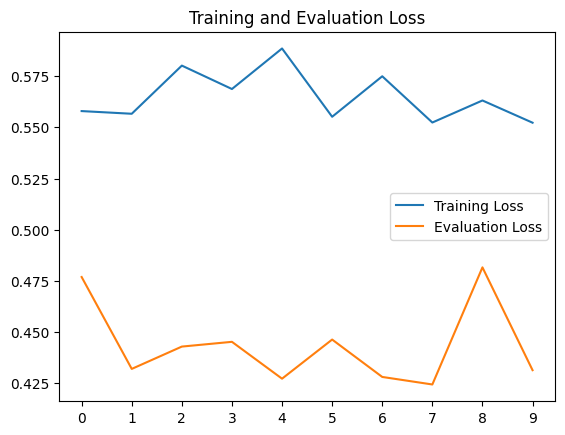

In [ ]:
plt.plot(training_epoch_loss, label="Training Loss")
plt.plot(eval_epoch_loss, label="Evaluation Loss")
plt.legend()
plt.title("Training and Evaluation Loss")
plt.xticks(range(10))
plt.show()

In [ ]:
#Evaluate the accuracy of the model
acc = Accuracy(task="binary")

net.eval()
with torch.no_grad():
  for features, labels in dataloader_test:
    outputs = net(features)
    preds = (outputs >= 0.5).float()
    acc(preds, labels.view(-1, 1))

accuracy = acc.compute()
print(f"Accuracy: {accuracy}")
net.train()

Accuracy: 0.9677419066429138


Net(
  (fc1): Linear(in_features=14, out_features=16, bias=True)
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
features2, labels2 = next(iter(dataloader_test))
print(features2, labels2)

tensor([[1.1000e+02, 7.2917e-01, 0.0000e+00, 0.0000e+00, 8.1132e-01, 4.5434e-01,
         0.0000e+00, 5.0000e-01, 6.3359e-01, 1.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 6.6667e-01],
        [8.0000e+00, 4.7917e-01, 1.0000e+00, 6.6667e-01, 7.3585e-01, 1.6667e-01,
         1.0000e+00, 5.0000e-01, 6.9466e-01, 0.0000e+00, 8.0645e-02, 1.0000e+00,
         0.0000e+00, 1.0000e+00]], dtype=torch.float64) tensor([1., 1.], dtype=torch.float64)


In [ ]:
output2 = net(features2)

In [ ]:
print(output2)

tensor([[0.2698],
        [0.7858]], dtype=torch.float64, grad_fn=<SigmoidBackward0>)


In [ ]:
pred1 = (output2 > 0.5).float()

In [ ]:
print(pred1)

tensor([[0.],
        [1.]])


In [ ]:
test_output_np = (pred1.detach().numpy())
print(test_output_np)

[[0.]
 [1.]]


In [ ]:
result = pd.DataFrame(test_output_np, columns=['prediction'])
print(result)

   prediction
0         0.0
1         1.0
